In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df = pd.read_excel("real_estate.xlsx")

In [3]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df2 = df
df2 = df2.drop('X2 house age', axis = 1)
df2

,No,X1 transaction date,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,410,2013.000000,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,104.81010,5,24.96674,121.54067,52.5


In [5]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [6]:
x = df['X2 house age']
y = df['Y house price of unit area']

In [7]:
X_Train, x_test, Y_Train, y_test= train_test_split(x, y, test_size= 0.2)

In [8]:
model= LinearRegression(n_jobs= -1)
model.fit(np.array(X_Train).reshape(-1, 1), np.array(Y_Train).reshape(-1, 1))

LinearRegression(n_jobs=-1)

In [9]:
print("Intercept: ", model.intercept_[0])
print("Slope: ", model.coef_[0][0])
print("The equation is as follows: Y= House Age*", model.coef_[0][0], " + ",model.intercept_[0])

Intercept:  43.184759295541404
Slope:  -0.2852533822627442
The equation is as follows: Y= House Age* -0.2852533822627442  +  43.184759295541404


In [10]:
predict= model.predict(np.array(x_test).reshape(-1, 1))

In [11]:
print("mean square error: ", mean_squared_error(predict, y_test))
print("r2_score: ", r2_score(predict, y_test))

mean square error:  163.35454914471552
r2_score:  -14.427642860117


<AxesSubplot:xlabel='X2 house age', ylabel='Y house price of unit area'>

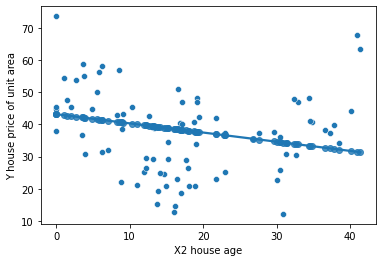

In [12]:
sns.scatterplot(x=x_test, y=y_test)
sns.regplot(x=x_test, y=predict)

mean sq error for  X3 distance to the nearest MRT station  column:  111.92587632697433
r2_score for X3 distance to the nearest MRT station  column:  -0.8589743974984225 



mean sq error for  X4 number of convenience stores  column:  205.8788378285355
r2_score for X4 number of convenience stores  column:  -2.6491220712819006 



mean sq error for  X5 latitude  column:  147.45636134099183
r2_score for X5 latitude  column:  -1.899114269740847 



mean sq error for  X6 longitude  column:  128.24141092574538
r2_score for X6 longitude  column:  -2.2284621401187144 





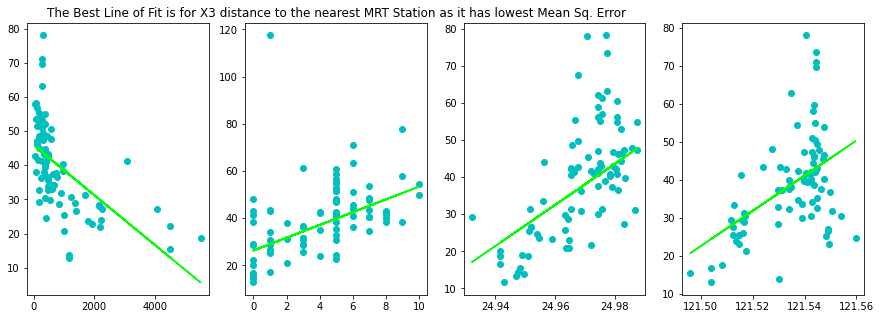

In [13]:
plt.rcParams['figure.figsize']= (15, 5)
fig, axes= plt.subplots(1, 4)
ranger= 0
for k in df.columns[3:-1]:
    X1= df[k]
    X_Train, x_test, Y_Train, y_test= train_test_split(X1, y, test_size= 0.2)
    model= LinearRegression(n_jobs= -1)
    model.fit(np.array(X_Train).reshape(-1, 1), np.array(Y_Train).reshape(-1, 1))
    predict= model.predict(np.array(x_test).reshape(-1, 1))
    axes[ranger].plot(x_test, y_test, 'co')
    axes[ranger].plot(x_test, predict, 'lime')
    ranger+=1
    print("mean sq error for ",k," column: ", mean_squared_error(predict, y_test))
    print("r2_score for", k ," column: ", r2_score(predict, y_test), '\n\n\n')

axes[1].set_title("The Best Line of Fit is for X3 distance to the nearest MRT Station as it has lowest Mean Sq. Error")
plt.show();